<a href="https://colab.research.google.com/github/Talieh-m/Data_Science/blob/main/K-Means%20%26%20HC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Librairies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# **Importing Dataset**

In [ ]:
df= pd.read_csv('K-means.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
np.round(df['MINIMUM_PAYMENTS'].isnull().sum()/len(df['MINIMUM_PAYMENTS'])*100, decimals=1)

3.5

In [ ]:
median_1=df['MINIMUM_PAYMENTS'].median()
df['MINIMUM_PAYMENTS'].fillna(median_1, inplace=True)
median_2=df['CREDIT_LIMIT'].median()
df['CREDIT_LIMIT'].fillna(median_2, inplace=True)
df.drop(columns=['CUST_ID'],axis=1, inplace=True)

# **Scaling the Data**

In [ ]:
#only two of the attributes are used
x=pd.DataFrame({'Balance':df['BALANCE'],"Purchase":df["PURCHASES"]})
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x= sc.fit_transform(x)

# **Training the Data with K-means Clustering**

Text(0, 0.5, 'customers')

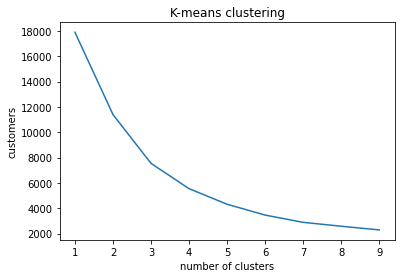

In [ ]:
from sklearn.cluster import KMeans
customers=[]
for i in range(1,10):
  kmean= KMeans(n_clusters= i, init= 'k-means++', random_state= 42)
  kmean.fit(x)
  customers.append(kmean.inertia_) 
plt.plot(range(1,10),customers)
plt.title('K-means clustering')
plt.xlabel('number of clusters')
plt.ylabel('customers')

In [ ]:
kmean= KMeans(n_clusters= 5, init="k-means++", random_state= 42)
y_predict= kmean.fit_predict(x)
print(y_predict)


[0 2 2 ... 0 0 0]


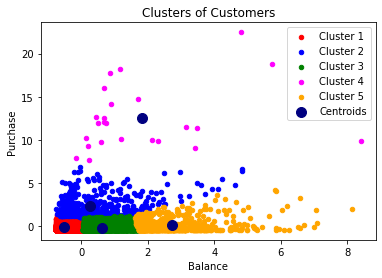

In [ ]:
plt.scatter(x[y_predict==0,0], x[y_predict==0, 1], s=20, c='red', label= 'Cluster 1')
plt.scatter(x[y_predict==1,0], x[y_predict==1, 1], s=20, c='blue', label= 'Cluster 2')
plt.scatter(x[y_predict==2,0], x[y_predict==2, 1], s=20, c='green', label= 'Cluster 3')
plt.scatter(x[y_predict==3,0], x[y_predict==3, 1], s=20, c='magenta', label= 'Cluster 4')
plt.scatter(x[y_predict==4,0], x[y_predict==4, 1], s=20, c='orange', label= 'Cluster 5')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:, 1], s=100, c='navy', label='Centroids') #s is the size of the circles
plt.title('Clusters of Customers')
plt.xlabel('Balance')
plt.ylabel('Purchase')
plt.legend()
plt.show()


# **Training the Data with HC**

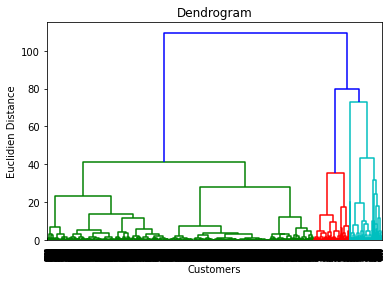

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidien Distance')
plt.show()


In [ ]:
pd.DataFrame({'ML method':['K-means', 'Hierarchical Clustering'],'No. of clusters':[5,4]})

,ML method,No. of clusters
0,K-means,5
1,Hierarchical Clustering,4
